In [1]:
source("bm_simulations.R")

Loading required package: tmvtnorm

Loading required package: mvtnorm

Loading required package: Matrix

Loading required package: stats4

Loading required package: gmm

Loading required package: sandwich

Loading required package: fCertificates

Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries

Loading required package: fOptions

Loading required package: fExoticOptions

Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: expm


Attaching package: ‘expm’


The following object is masked from ‘package:Matrix’:

    expm


Loading required package: cubature

########################################

This is YUIMA Project package v.1.9.6

Why don't you try yuimaGUI package?

Visit: http://www.yuima-project.com

###############################

### Arithmetic Brownian Motion (with drift and absorbing barrier)

#### nsim: number of BM sample paths to be simulated
#### t: final time point 
#### n: number of time intervals/increments from 0:t
#### X0: first value of BM at time 0
#### mu: drift
#### sigma: diffusion coefficient
#### L: barrier

### Geometric Brownian Motion (with absorbing barrier)

#### same variables as ABM

#### can also use version from yuima package

### Running Simulations in Parallel

In [7]:
run_parallel <- function(args, function_choice) {              

    if(function_choice == "abm") {
        f <- function(i){ # specify the desired function and parameter values here
            my_abm(nsim = args$nsim, t = args$t, n = args$n, X0 = args$xo, mu = args$mu, sigma = args$sigma, L = args$L) # keep nsim = 1 for now, will change later
        }
    } else {
        f <- function(i){ # specify the desired function and parameter values here
            my_gbm(nsim = args$nsim, t = args$t, n = args$n, X0 = args$xo, mu = args$mu, sigma = args$sigma, L = args$L) # keep nsim = 1 for now, will change later
        }
    }
    
set.seed(1)
res <- mclapply(X = 1:1000, f, mc.cores = 8, mc.set.seed = TRUE) # X is the n of sim as a vector 
                                                                # f is the function defined above 
                                                                # mc.cores is the number of cores you want to use 

s <- values(x = res, nsim = 1000, n = 1000) # indexing the BM values 
mval <- s[[1]] # BM values in a matrix (goes into the plotting function)
dfval <- s[[2]] # BM values in a data frame

h <- hittings(x = res, nsim = 1000, n = 1000) # indexing the hitting times 
mhit <- h[[1]] # in a matrix (for histograms)
dfhit <- h[[2]] # in a data frame 

p <- bmplot(x = mval, nsim = 1000, t = 1, n = 1000, L = 0, ylim = c(87.5, 100), # Define the range of the y-axis  
             title = "Brownian motion with negative drift and an absorbing barrier")
print(p)

hist(mhit, xlim = c(0, 1000), breaks = c(seq(from = 0, to = 1010, by = 10))) # Histogram of hitting times 
    
}

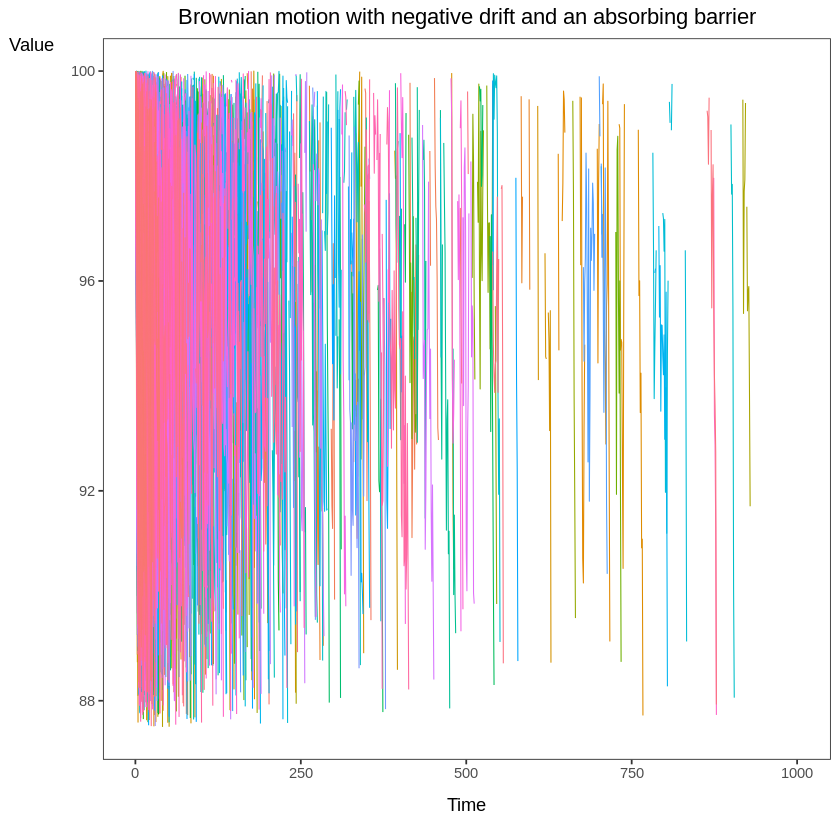

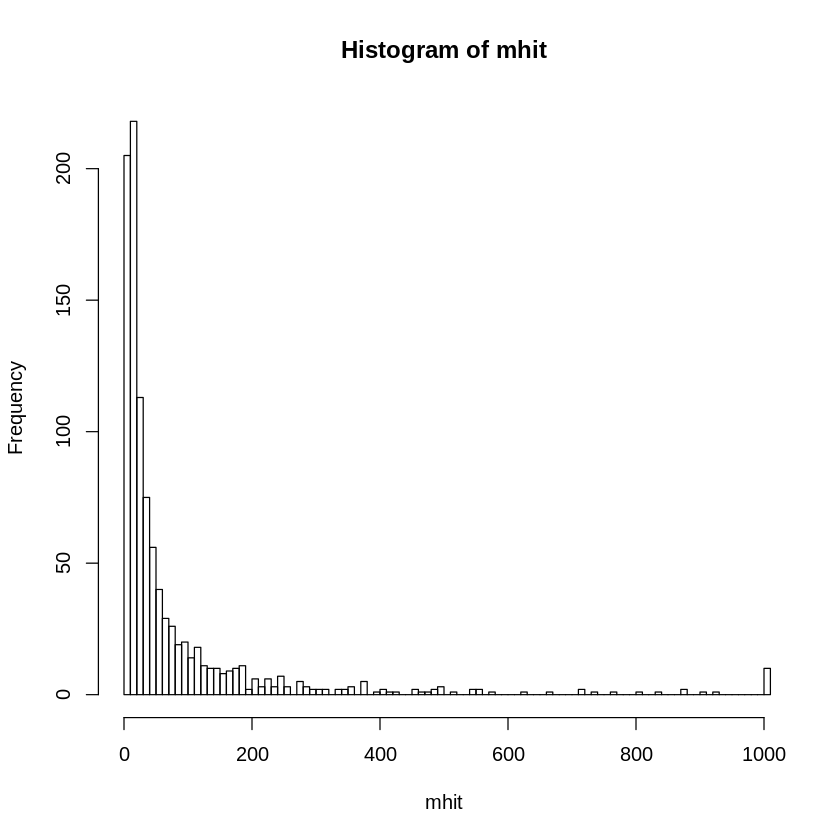

In [8]:
params = list(
    nsim=1,
    t=1,
    n=1000,
    xo=100,
    mu=-1,
    sigma=1,
    L=90
)

run_parallel(params, "gbm") # Changing the initial value to 100 made all the difference. The multiplicative process
# in GBM is not visible when applied to very small values such as 0 < X(t) < 1. Likewise, -1 drift does not affect
# ABM very much. It slowly goes down but never hits the barrier (see the below histogram) unless the barrier is 
# very very close and the drift is high. 

### Results

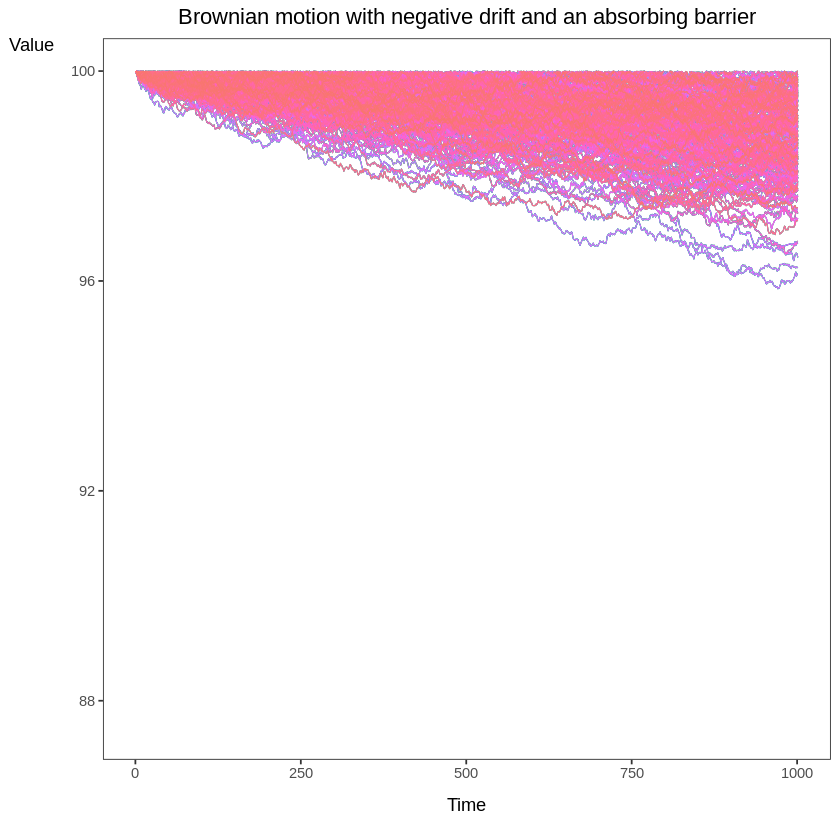

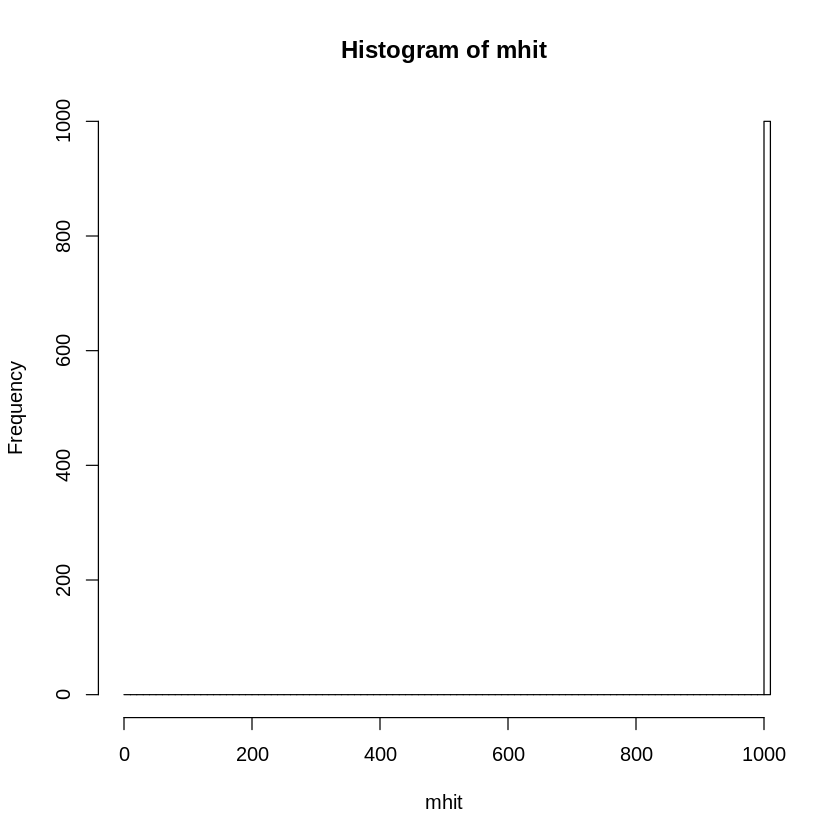

In [9]:
run_parallel(params, "abm")